In [1]:
import sys
sys.path.append("generative_transformer")
from data_loader import SliceDataLoader

slice_data_loader = SliceDataLoader(mode="transfer2",label="subclass")
slice_data_loader.prepare()

100%|██████████| 66/66 [00:04<00:00, 14.93it/s]


Prepared data:
 - Train: 51 slices
 - Val: 1 slices
 - Test: 1 slices
 - Fine-tune Train: 2 slices
 - Fine-tune Val: 1 slices
 - Fine-tune Test: 1 slices


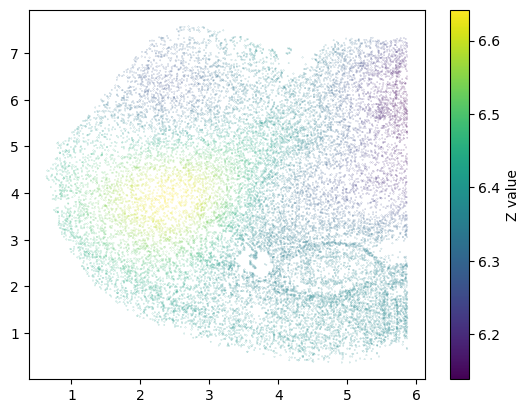

In [2]:
import matplotlib.pyplot as plt
i=0
plt.scatter(
    slice_data_loader.fine_tune_test_slices[i].obsm["aligned_spatial"][:, 0],
    slice_data_loader.fine_tune_test_slices[i].obsm["aligned_spatial"][:, 1],
    c=slice_data_loader.fine_tune_test_slices[i].obsm["aligned_spatial"][:, 2],
    s=0.01,
    cmap="viridis"  # or any other colormap like "plasma", "coolwarm", etc.
)
plt.colorbar(label="Z value")  # optional: shows the color scale
plt.show()

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from biological_model import BiologicalModel2
location_model = BiologicalModel2(slice_data_loader.train_slices+slice_data_loader.val_slices)#,z_factor=0.000001,bandwidth=0.00001)
location_model.fit()


/home/apdeshpa/projects/tissue-generator/biological_model.py:198: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  candidates = torch.tensor(candidates, dtype=torch.float32).cuda()


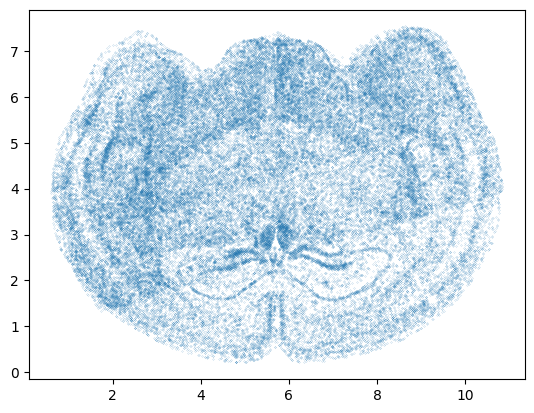

In [18]:
import matplotlib.pyplot as plt
samples=location_model.sample_slice_conditionally(slice_data_loader.test_slices[0], size=len(slice_data_loader.test_slices[0]), interior=None, dist_cutoff=0.5)

plt.scatter(samples[:,0], samples[:,1], s=0.01)
plt.show()

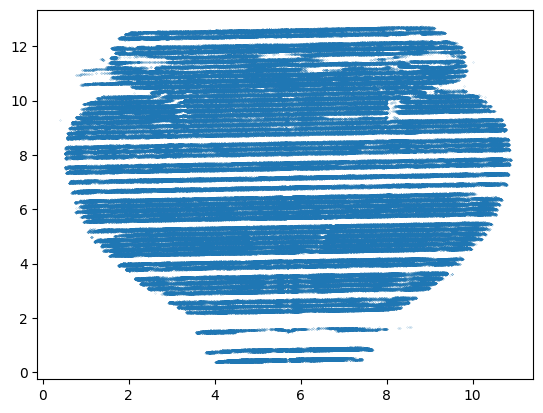

In [10]:
import anndata as ad
mask=(ad.concat(slice_data_loader.train_slices).obsm["aligned_spatial"][:,1]<4)&(ad.concat(slice_data_loader.train_slices).obsm["aligned_spatial"][:,1]>3)
plt.scatter(ad.concat(slice_data_loader.train_slices).obsm["aligned_spatial"][:,0][mask],ad.concat(slice_data_loader.train_slices).obsm["aligned_spatial"][:,2][mask],s=0.01)
plt.show()

In [12]:
# P(region|location)
from celltype_model import CelltypeModel
celltype_model = CelltypeModel(slice_data_loader.fine_tune_train_slices,slice_data_loader.gene_exp_model.num_tokens, val_slice=slice_data_loader.fine_tune_val_slices[0], epochs=500,learning_rate=0.001, batch_size=1024, device="cuda")
# celltype_model.load_model("model_checkpoints/best_model_intra2hole.pt")
celltype_model.fit()
# celltype_model.load_model("model_checkpoints/best_model_intra2hole.pt")

🚀 Epoch [1/500] - Loss: 3.1394 - Accuracy: 0.2214
🚀 Epoch [2/500] - Loss: 2.6839 - Accuracy: 0.2545
🚀 Epoch [3/500] - Loss: 2.5548 - Accuracy: 0.2624
🚀 Epoch [4/500] - Loss: 2.4757 - Accuracy: 0.2696


  2%|▏         | 392/16505 [00:00<00:07, 2017.34it/s]

0.4039810927844342


 62%|██████▏   | 10308/16505 [00:04<00:02, 2293.20it/s]

0.5853908358505291


100%|██████████| 16505/16505 [00:07<00:00, 2246.21it/s]


🔍 Validation soft accuracy at epoch 5: 0.5891
🚀 Epoch [5/500] - Loss: 2.4198 - Accuracy: 0.2801
🚀 Epoch [6/500] - Loss: 2.3657 - Accuracy: 0.2914
🚀 Epoch [7/500] - Loss: 2.3288 - Accuracy: 0.3007
🚀 Epoch [8/500] - Loss: 2.2892 - Accuracy: 0.3092
🚀 Epoch [9/500] - Loss: 2.2554 - Accuracy: 0.3213


  1%|▏         | 247/16505 [00:00<00:06, 2462.46it/s]

0.29633362966711124


 63%|██████▎   | 10457/16505 [00:04<00:02, 2197.94it/s]

0.6209796659601189


100%|██████████| 16505/16505 [00:07<00:00, 2318.83it/s]


🔍 Validation soft accuracy at epoch 10: 0.6222
🚀 Epoch [10/500] - Loss: 2.2306 - Accuracy: 0.3278
🚀 Epoch [11/500] - Loss: 2.2165 - Accuracy: 0.3306
🚀 Epoch [12/500] - Loss: 2.1918 - Accuracy: 0.3360
🚀 Epoch [13/500] - Loss: 2.1815 - Accuracy: 0.3400
🚀 Epoch [14/500] - Loss: 2.1647 - Accuracy: 0.3427


  2%|▏         | 252/16505 [00:00<00:06, 2512.02it/s]

0.9035253315161442


 63%|██████▎   | 10383/16505 [00:04<00:02, 2429.53it/s]

0.6580053526401038


100%|██████████| 16505/16505 [00:07<00:00, 2294.39it/s]


🔍 Validation soft accuracy at epoch 15: 0.6561
🚀 Epoch [15/500] - Loss: 2.1523 - Accuracy: 0.3444
🚀 Epoch [16/500] - Loss: 2.1414 - Accuracy: 0.3491
🚀 Epoch [17/500] - Loss: 2.1330 - Accuracy: 0.3496
🚀 Epoch [18/500] - Loss: 2.1230 - Accuracy: 0.3521
🚀 Epoch [19/500] - Loss: 2.1061 - Accuracy: 0.3547


  2%|▏         | 252/16505 [00:00<00:06, 2513.37it/s]

0.8614283623897067


 63%|██████▎   | 10375/16505 [00:04<00:02, 2372.95it/s]

0.6639659715056873


100%|██████████| 16505/16505 [00:07<00:00, 2334.70it/s]


🔍 Validation soft accuracy at epoch 20: 0.6624
🚀 Epoch [20/500] - Loss: 2.1020 - Accuracy: 0.3576
🚀 Epoch [21/500] - Loss: 2.0934 - Accuracy: 0.3585
🚀 Epoch [22/500] - Loss: 2.0838 - Accuracy: 0.3624
🚀 Epoch [23/500] - Loss: 2.0702 - Accuracy: 0.3655
🚀 Epoch [24/500] - Loss: 2.0696 - Accuracy: 0.3647


  2%|▏         | 249/16505 [00:00<00:06, 2472.64it/s]

0.8510670176273729


 63%|██████▎   | 10407/16505 [00:04<00:02, 2470.13it/s]

0.6752070841850429


100%|██████████| 16505/16505 [00:06<00:00, 2396.40it/s]


🔍 Validation soft accuracy at epoch 25: 0.6742
🚀 Epoch [25/500] - Loss: 2.0613 - Accuracy: 0.3673
🚀 Epoch [26/500] - Loss: 2.0526 - Accuracy: 0.3719
🚀 Epoch [27/500] - Loss: 2.0450 - Accuracy: 0.3713
🚀 Epoch [28/500] - Loss: 2.0425 - Accuracy: 0.3721
🚀 Epoch [29/500] - Loss: 2.0354 - Accuracy: 0.3749


  3%|▎         | 505/16505 [00:00<00:06, 2522.87it/s]

0.40158725257230393


 63%|██████▎   | 10403/16505 [00:04<00:02, 2462.80it/s]

0.6669055209919025


100%|██████████| 16505/16505 [00:07<00:00, 2339.74it/s]


🔍 Validation soft accuracy at epoch 30: 0.6655
🚀 Epoch [30/500] - Loss: 2.0286 - Accuracy: 0.3776
🚀 Epoch [31/500] - Loss: 2.0229 - Accuracy: 0.3755
🚀 Epoch [32/500] - Loss: 2.0186 - Accuracy: 0.3779
🚀 Epoch [33/500] - Loss: 2.0110 - Accuracy: 0.3797
🚀 Epoch [34/500] - Loss: 2.0099 - Accuracy: 0.3782


  2%|▏         | 253/16505 [00:00<00:06, 2529.65it/s]

0.7016188195859084


 63%|██████▎   | 10474/16505 [00:04<00:02, 2180.24it/s]

0.6886966365670653


100%|██████████| 16505/16505 [00:06<00:00, 2358.34it/s]


🔍 Validation soft accuracy at epoch 35: 0.6880
🚀 Epoch [35/500] - Loss: 2.0072 - Accuracy: 0.3796
🚀 Epoch [36/500] - Loss: 2.0012 - Accuracy: 0.3799
🚀 Epoch [37/500] - Loss: 2.0013 - Accuracy: 0.3806
🚀 Epoch [38/500] - Loss: 1.9906 - Accuracy: 0.3815
🚀 Epoch [39/500] - Loss: 1.9959 - Accuracy: 0.3803


  3%|▎         | 506/16505 [00:00<00:06, 2523.49it/s]

0.5578319375835659


 64%|██████▎   | 10482/16505 [00:04<00:02, 2446.31it/s]

0.6918373013806534


100%|██████████| 16505/16505 [00:07<00:00, 2349.04it/s]


🔍 Validation soft accuracy at epoch 40: 0.6937
🚀 Epoch [40/500] - Loss: 1.9883 - Accuracy: 0.3842
🚀 Epoch [41/500] - Loss: 1.9821 - Accuracy: 0.3831
🚀 Epoch [42/500] - Loss: 1.9846 - Accuracy: 0.3858
🚀 Epoch [43/500] - Loss: 1.9826 - Accuracy: 0.3831
🚀 Epoch [44/500] - Loss: 1.9709 - Accuracy: 0.3878


  3%|▎         | 435/16505 [00:00<00:07, 2229.72it/s]

0.7869470848066686


 63%|██████▎   | 10466/16505 [00:04<00:02, 2485.32it/s]

0.6818588273730177


100%|██████████| 16505/16505 [00:07<00:00, 2352.24it/s]


🔍 Validation soft accuracy at epoch 45: 0.6843
🚀 Epoch [45/500] - Loss: 1.9702 - Accuracy: 0.3881
🚀 Epoch [46/500] - Loss: 1.9747 - Accuracy: 0.3853
🚀 Epoch [47/500] - Loss: 1.9656 - Accuracy: 0.3878
🚀 Epoch [48/500] - Loss: 1.9661 - Accuracy: 0.3884
🚀 Epoch [49/500] - Loss: 1.9603 - Accuracy: 0.3900


  2%|▏         | 252/16505 [00:00<00:06, 2514.43it/s]

0.43991679408075085


 63%|██████▎   | 10465/16505 [00:04<00:02, 2360.02it/s]

0.698473749873724


100%|██████████| 16505/16505 [00:06<00:00, 2357.96it/s]


🔍 Validation soft accuracy at epoch 50: 0.6984
🚀 Epoch [50/500] - Loss: 1.9595 - Accuracy: 0.3898
🚀 Epoch [51/500] - Loss: 1.9556 - Accuracy: 0.3916
🚀 Epoch [52/500] - Loss: 1.9572 - Accuracy: 0.3881
🚀 Epoch [53/500] - Loss: 1.9460 - Accuracy: 0.3915
🚀 Epoch [54/500] - Loss: 1.9476 - Accuracy: 0.3935


  3%|▎         | 500/16505 [00:00<00:06, 2498.73it/s]

0.7298004491997618


 62%|██████▏   | 10258/16505 [00:05<00:03, 1964.97it/s]

0.6909785362634532


100%|██████████| 16505/16505 [00:08<00:00, 1990.28it/s]


🔍 Validation soft accuracy at epoch 55: 0.6880
🚀 Epoch [55/500] - Loss: 1.9477 - Accuracy: 0.3924
🚀 Epoch [56/500] - Loss: 1.9429 - Accuracy: 0.3921
🚀 Epoch [57/500] - Loss: 1.9437 - Accuracy: 0.3937
🚀 Epoch [58/500] - Loss: 1.9432 - Accuracy: 0.3956
🚀 Epoch [59/500] - Loss: 1.9403 - Accuracy: 0.3946


  2%|▏         | 253/16505 [00:00<00:06, 2521.03it/s]

0.554256522196772


 63%|██████▎   | 10327/16505 [00:04<00:02, 2240.10it/s]

0.6993768744770857


100%|██████████| 16505/16505 [00:07<00:00, 2296.93it/s]


🔍 Validation soft accuracy at epoch 60: 0.7005
🚀 Epoch [60/500] - Loss: 1.9374 - Accuracy: 0.3934
🚀 Epoch [61/500] - Loss: 1.9339 - Accuracy: 0.3962
🚀 Epoch [62/500] - Loss: 1.9314 - Accuracy: 0.3966
🚀 Epoch [63/500] - Loss: 1.9327 - Accuracy: 0.3962
🚀 Epoch [64/500] - Loss: 1.9288 - Accuracy: 0.3974


  2%|▏         | 251/16505 [00:00<00:06, 2507.93it/s]

0.9347546382694412


 63%|██████▎   | 10387/16505 [00:04<00:02, 2451.48it/s]

0.6886724066447967


100%|██████████| 16505/16505 [00:06<00:00, 2397.09it/s]


🔍 Validation soft accuracy at epoch 65: 0.6881
🚀 Epoch [65/500] - Loss: 1.9258 - Accuracy: 0.3971
🚀 Epoch [66/500] - Loss: 1.9231 - Accuracy: 0.3975
🚀 Epoch [67/500] - Loss: 1.9226 - Accuracy: 0.4002
🚀 Epoch [68/500] - Loss: 1.9252 - Accuracy: 0.3973
🚀 Epoch [69/500] - Loss: 1.9178 - Accuracy: 0.4010


  2%|▏         | 252/16505 [00:00<00:06, 2511.57it/s]

0.6868828247317466


 63%|██████▎   | 10362/16505 [00:04<00:02, 2466.16it/s]

0.6974844189885392


100%|██████████| 16505/16505 [00:07<00:00, 2333.94it/s]


🔍 Validation soft accuracy at epoch 70: 0.6996
🚀 Epoch [70/500] - Loss: 1.9151 - Accuracy: 0.4007
🚀 Epoch [71/500] - Loss: 1.9173 - Accuracy: 0.4002
🚀 Epoch [72/500] - Loss: 1.9168 - Accuracy: 0.4008
🚀 Epoch [73/500] - Loss: 1.9125 - Accuracy: 0.4007
🚀 Epoch [74/500] - Loss: 1.9107 - Accuracy: 0.4034


  2%|▏         | 252/16505 [00:00<00:06, 2511.31it/s]

0.6646763931717284


 63%|██████▎   | 10357/16505 [00:04<00:02, 2442.52it/s]

0.7124299268299185


100%|██████████| 16505/16505 [00:07<00:00, 2319.86it/s]


🔍 Validation soft accuracy at epoch 75: 0.7124
🚀 Epoch [75/500] - Loss: 1.9143 - Accuracy: 0.4008
🚀 Epoch [76/500] - Loss: 1.9128 - Accuracy: 0.4019
🚀 Epoch [77/500] - Loss: 1.9121 - Accuracy: 0.4004
🚀 Epoch [78/500] - Loss: 1.9124 - Accuracy: 0.3995
🚀 Epoch [79/500] - Loss: 1.9038 - Accuracy: 0.4046


  2%|▏         | 249/16505 [00:00<00:06, 2486.86it/s]

0.8401388774085707


 63%|██████▎   | 10353/16505 [00:04<00:02, 2478.13it/s]

0.7031032585131932


100%|██████████| 16505/16505 [00:07<00:00, 2344.32it/s]


🔍 Validation soft accuracy at epoch 80: 0.7034
🚀 Epoch [80/500] - Loss: 1.9047 - Accuracy: 0.4032
🚀 Epoch [81/500] - Loss: 1.9054 - Accuracy: 0.3998
🚀 Epoch [82/500] - Loss: 1.9024 - Accuracy: 0.4022
🚀 Epoch [83/500] - Loss: 1.9028 - Accuracy: 0.4019
🚀 Epoch [84/500] - Loss: 1.8971 - Accuracy: 0.4042


  2%|▏         | 252/16505 [00:00<00:06, 2512.52it/s]

0.7569987502835318


 63%|██████▎   | 10389/16505 [00:04<00:02, 2473.41it/s]

0.7041212737409348


100%|██████████| 16505/16505 [00:07<00:00, 2324.81it/s]


🔍 Validation soft accuracy at epoch 85: 0.7053
🚀 Epoch [85/500] - Loss: 1.8983 - Accuracy: 0.4056
🚀 Epoch [86/500] - Loss: 1.8944 - Accuracy: 0.4039
🚀 Epoch [87/500] - Loss: 1.8964 - Accuracy: 0.4054
🚀 Epoch [88/500] - Loss: 1.8894 - Accuracy: 0.4085
🚀 Epoch [89/500] - Loss: 1.8915 - Accuracy: 0.4058


  3%|▎         | 496/16505 [00:00<00:06, 2476.72it/s]

0.7676103107863972


 62%|██████▏   | 10250/16505 [00:04<00:02, 2191.99it/s]

0.6950292054298447


100%|██████████| 16505/16505 [00:07<00:00, 2316.33it/s]


🔍 Validation soft accuracy at epoch 90: 0.6963
🚀 Epoch [90/500] - Loss: 1.8871 - Accuracy: 0.4070
🚀 Epoch [91/500] - Loss: 1.8895 - Accuracy: 0.4047
🚀 Epoch [92/500] - Loss: 1.8941 - Accuracy: 0.4044
🚀 Epoch [93/500] - Loss: 1.8935 - Accuracy: 0.4047
🚀 Epoch [94/500] - Loss: 1.8852 - Accuracy: 0.4071


  2%|▏         | 254/16505 [00:00<00:06, 2533.48it/s]

0.6817541583256874


 63%|██████▎   | 10375/16505 [00:04<00:02, 2382.40it/s]

0.7046247595670778


100%|██████████| 16505/16505 [00:07<00:00, 2295.16it/s]


🔍 Validation soft accuracy at epoch 95: 0.7059
🚀 Epoch [95/500] - Loss: 1.8851 - Accuracy: 0.4091
🚀 Epoch [96/500] - Loss: 1.8828 - Accuracy: 0.4066
🚀 Epoch [97/500] - Loss: 1.8797 - Accuracy: 0.4073
🚀 Epoch [98/500] - Loss: 1.8863 - Accuracy: 0.4078
🚀 Epoch [99/500] - Loss: 1.8790 - Accuracy: 0.4096


  1%|          | 194/16505 [00:00<00:08, 1938.98it/s]

0.9723905313933007


 63%|██████▎   | 10445/16505 [00:04<00:02, 2443.67it/s]

0.7035819355650571


100%|██████████| 16505/16505 [00:07<00:00, 2295.74it/s]


🔍 Validation soft accuracy at epoch 100: 0.7058
⏹️ Early stopping triggered due to no improvement.
💾 Best model restored and saved to best_model.pt


In [5]:
%load_ext autoreload
%autoreload 2
from inference3 import Inferernce
from evaluator2 import Evaluator

config = {
    "infer_location": True,
    "location_inference_type": "model",
    "infer_subclass": True,
    "subclass_inference_type": "model",
    "homogenize_subclass": True,
    "infer_gene_expression": False,
    "expression_inference_type": "lookup",
}

inference = Inferernce(location_model=location_model, subclass_model=celltype_model, slice_data_loader=slice_data_loader, config=config)
predicted_adata_infer = inference.run_inference(slice_data_loader.fine_tune_test_slices)

# from evaluator2 import Evaluator
# evaluator = Evaluator()
# evaluator.evaluate(predicted_adata, slice_data_loader.test_slices[0])


/home/apdeshpa/projects/tissue-generator/biological_model.py:198: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  candidates = torch.tensor(candidates, dtype=torch.float32).cuda()
/home/apdeshpa/projects/tissue-generator/analysis.py:128: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xyz_tensor = torch.tensor(xyz, dtype=torch.float32).to(device)


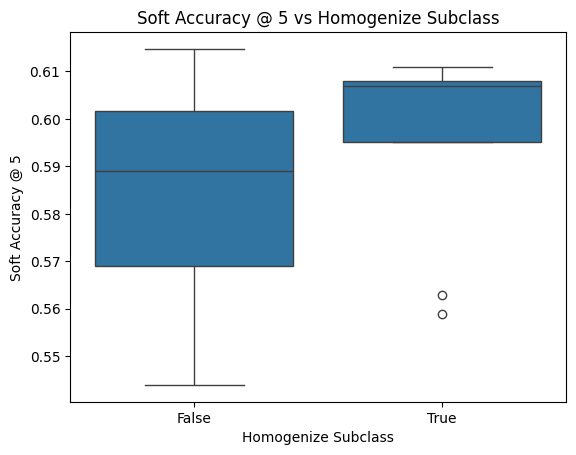

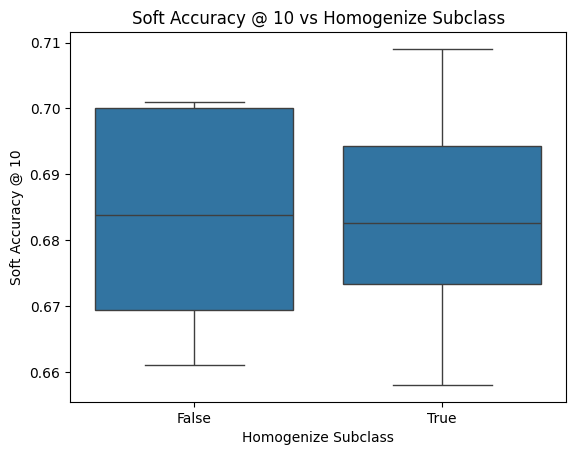

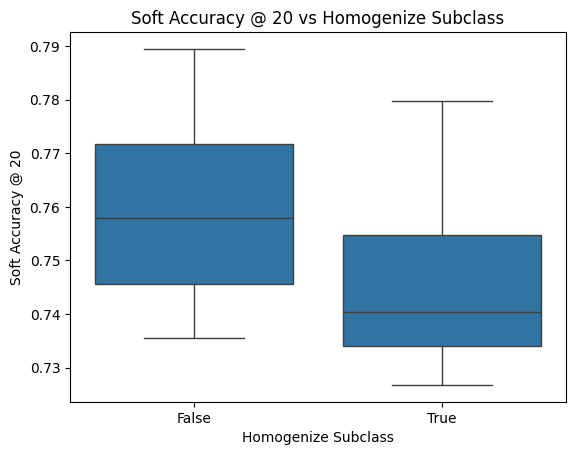

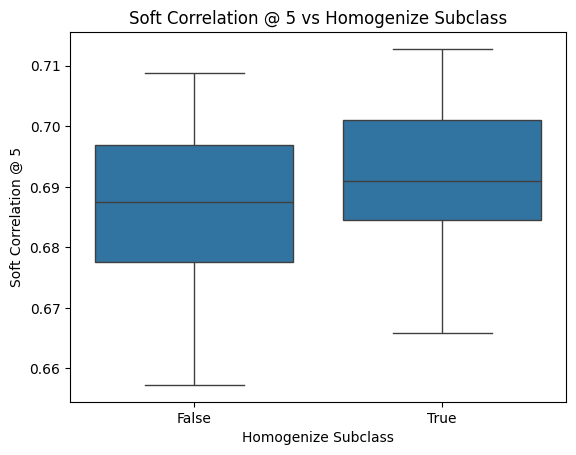

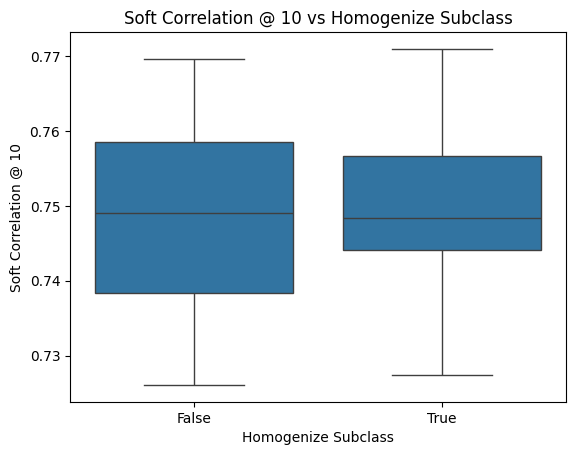

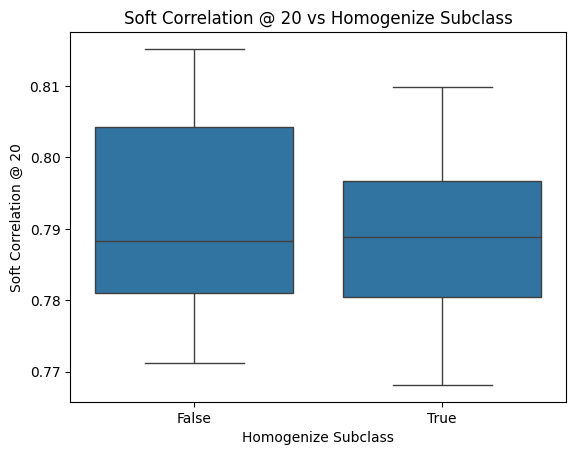

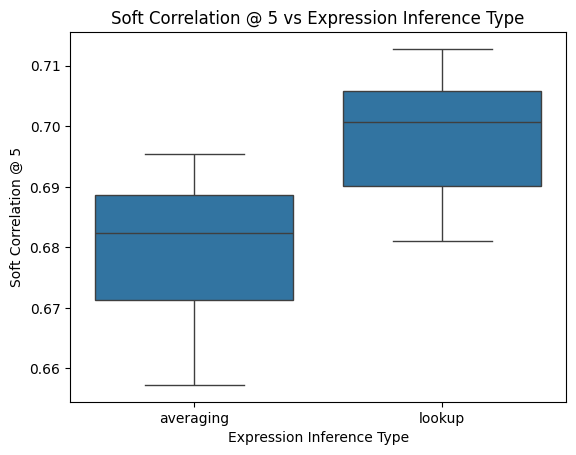

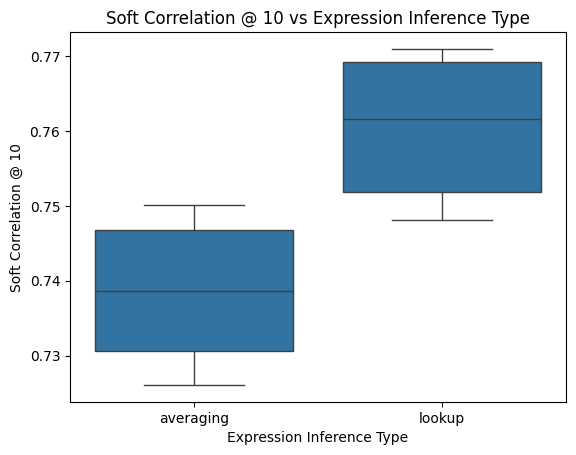

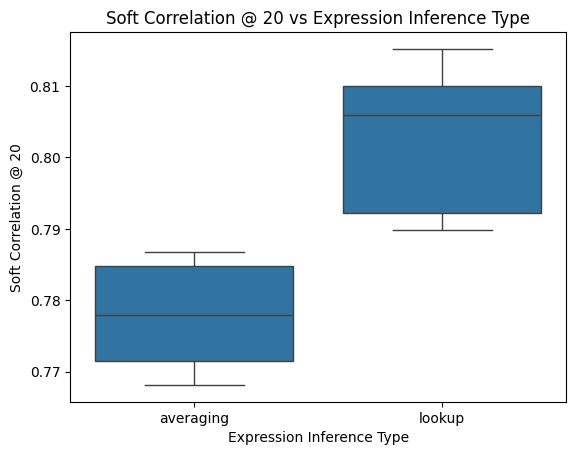

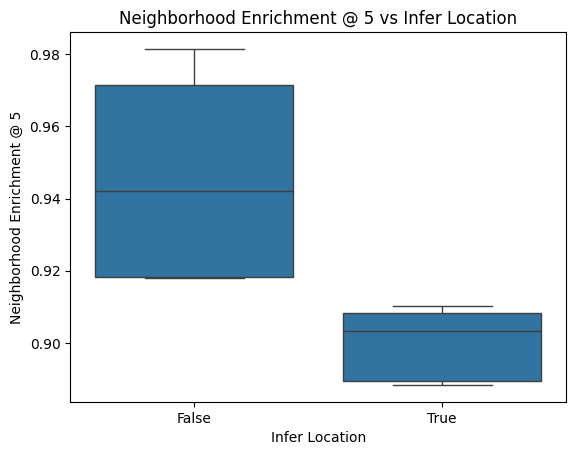

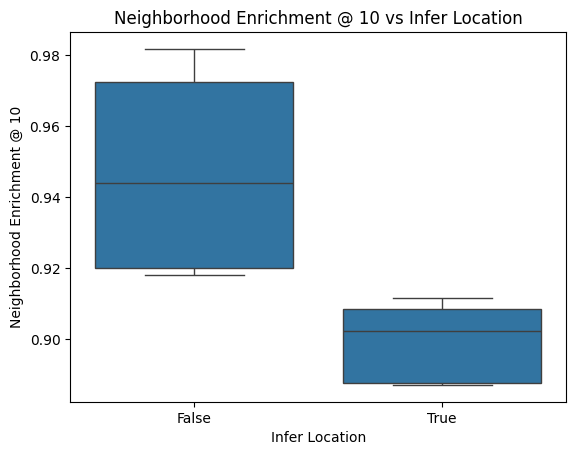

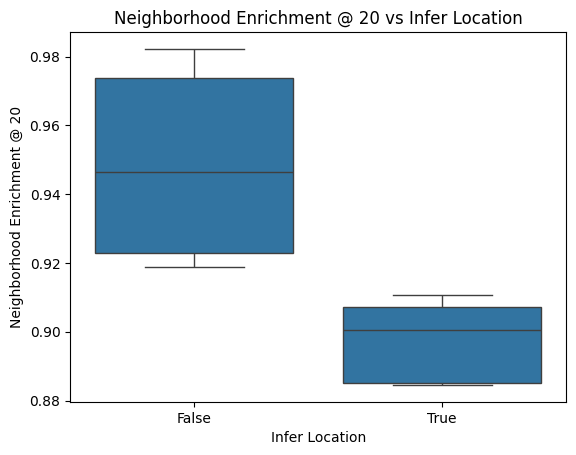

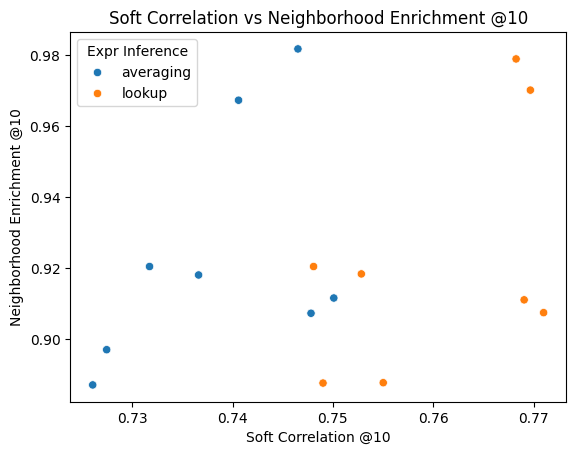

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("inference_results_intra.csv")

# Convert boolean strings to actual booleans for cleaner plotting
bool_cols = ['infer_location', 'infer_subclass', 'homogenize_subclass', 'infer_gene_expression']
df[bool_cols] = df[bool_cols].astype(bool)

# 1. Soft accuracy vs homogenize_subclass
for k in [5, 10, 20]:
    sns.boxplot(data=df, x='homogenize_subclass', y=f'soft_accuracy@{k}')
    plt.title(f'Soft Accuracy @ {k} vs Homogenize Subclass')
    plt.xlabel('Homogenize Subclass')
    plt.ylabel(f'Soft Accuracy @ {k}')
    plt.show()

# 2. Soft correlation vs homogenize_subclass
for k in [5, 10, 20]:
    sns.boxplot(data=df, x='homogenize_subclass', y=f'soft_correlation@{k}')
    plt.title(f'Soft Correlation @ {k} vs Homogenize Subclass')
    plt.xlabel('Homogenize Subclass')
    plt.ylabel(f'Soft Correlation @ {k}')
    plt.show()

# 3. Soft correlation grouped by expression inference type
for k in [5, 10, 20]:
    sns.boxplot(data=df, x='expression_inference_type', y=f'soft_correlation@{k}')
    plt.title(f'Soft Correlation @ {k} vs Expression Inference Type')
    plt.xlabel('Expression Inference Type')
    plt.ylabel(f'Soft Correlation @ {k}')
    plt.show()

# 4. Neighborhood enrichment vs infer_location
for k in [5, 10, 20]:
    sns.boxplot(data=df, x='infer_location', y=f'neighborhood_enrichment@{k}')
    plt.title(f'Neighborhood Enrichment @ {k} vs Infer Location')
    plt.xlabel('Infer Location')
    plt.ylabel(f'Neighborhood Enrichment @ {k}')
    plt.show()

# 5. Scatter: soft_correlation@10 vs neighborhood_enrichment@10
sns.scatterplot(data=df, x='soft_correlation@10', y='neighborhood_enrichment@10', hue='expression_inference_type')
plt.title('Soft Correlation vs Neighborhood Enrichment @10')
plt.xlabel('Soft Correlation @10')
plt.ylabel('Neighborhood Enrichment @10')
plt.legend(title='Expr Inference')
plt.show()






In [8]:
import tqdm
import tqdm
import numpy as np
from scipy.spatial import cKDTree

def lookup_correlation(gt_celltypes, gt_positions, gt_expressions,
                       ref_celltypes, ref_positions, ref_expressions,
                       pred_celltypes, pred_positions, pred_exp,
                       radius=None, k=0, sample=None, ref_sample=None,
                       avg_k=20):
    """
    For each predicted cell, find the closest `avg_k` reference cells
    with the same celltype, and average their expressions.

    Arguments:
    - gt_*: ground-truth celltypes/positions/expressions for computing correlation
    - ref_*: reference celltypes/positions/expressions used for lookup
    - pred_*: predicted celltypes/positions (used for matching)
    """

    if ref_sample is not None:
        percent = ref_sample
        n = int(len(ref_positions) * percent / 100)
        indices = np.random.choice(len(ref_positions), size=n, replace=False)
        ref_celltypes = [ref_celltypes[i] for i in indices]
        ref_positions = [ref_positions[i] for i in indices]
        ref_expressions = ref_expressions[indices]

    ref_expressions = ref_expressions.todense().tolist()

    gt_positions = np.array(gt_positions)
    pred_positions = np.array(pred_positions)
    gt_expressions = np.array(gt_expressions)

    ref_positions = np.array(ref_positions)
    ref_expressions = np.array(ref_expressions)

    pred_expressions_lookup = np.zeros((len(pred_positions), ref_expressions.shape[1]))

    ref_by_type = {}
    for i, ct in enumerate(ref_celltypes):
        ref_by_type.setdefault(ct, []).append(i)

    for i, (ct, pos) in tqdm.tqdm(enumerate(list(zip(pred_celltypes, pred_positions)))):
        if ct not in ref_by_type:
            continue
        indices = ref_by_type[ct]
        ref_subset = ref_positions[indices]
        tree = cKDTree(ref_subset)

        k_query = min(avg_k, len(ref_subset))
        _, idxs = tree.query(pos, k=k_query)
        if k_query == 1:
            idxs = [idxs]

        selected_exps = [ref_expressions[indices[j]] for j in idxs]
        pred_expressions_lookup[i] = np.mean(selected_exps, axis=0)

    return soft_correlation(
        gt_expressions=gt_expressions,
        gt_positions=gt_positions,
        pred_expressions=pred_expressions_lookup,
        pred_positions=pred_positions,
        radius=radius,
        k=k,
        sample=sample
    )

#slice_data_loader.gene_exp_model.get_gene_exp_from_token(adata_sampled.obs["token"].tolist())
percent = 1
n = int(len(new_tissue) * percent / 100)
indices = np.random.choice(len(new_tissue), size=n, replace=False)
sampled_gt=new_tissue[indices]

percent = 10
n = int(len(adata_sampled) * percent / 100)
indices = np.random.choice(len(adata_sampled), size=n, replace=False)
adata_sampled_sampled=adata_sampled[indices]

ref_tissue=ad.concat(slice_data_loader.train_slices)

lookup_correlation(sampled_gt.obs["token"].to_numpy().tolist(),sampled_gt.obsm["aligned_spatial"],sampled_gt.X.todense().tolist(),ref_tissue.obs["token"].to_numpy().tolist(),ref_tissue.obsm["aligned_spatial"],ref_tissue.X,adata_sampled_sampled.obs["token"].tolist(),adata_sampled_sampled.obsm["spatial"],None,k=20,ref_sample=1)

NameError: name 'new_tissue' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Your existing plot
plt.plot(np.array(ress), label="adapted model")
plt.plot(np.array(ress2), label="original model")
plt.legend()

# Add vertical lines for training points
plt.axvline(x=20, color='gray', linestyle='--')
plt.axvline(x=40, color='gray', linestyle='--')
plt.ylim(0.5,0.85)
ymin, ymax = plt.ylim()
plt.text(20, ymax * 0.8, 'Training', rotation=90, va='top', ha='right')
plt.text(40, ymax * 0.8, 'Training', rotation=90, va='top', ha='right')

# Add vertical line for validation point
plt.axvline(x=43, color='red', linestyle='--')
plt.text(43, ymax * 0.8, 'Validation', rotation=90, va='top', ha='left')

plt.show()


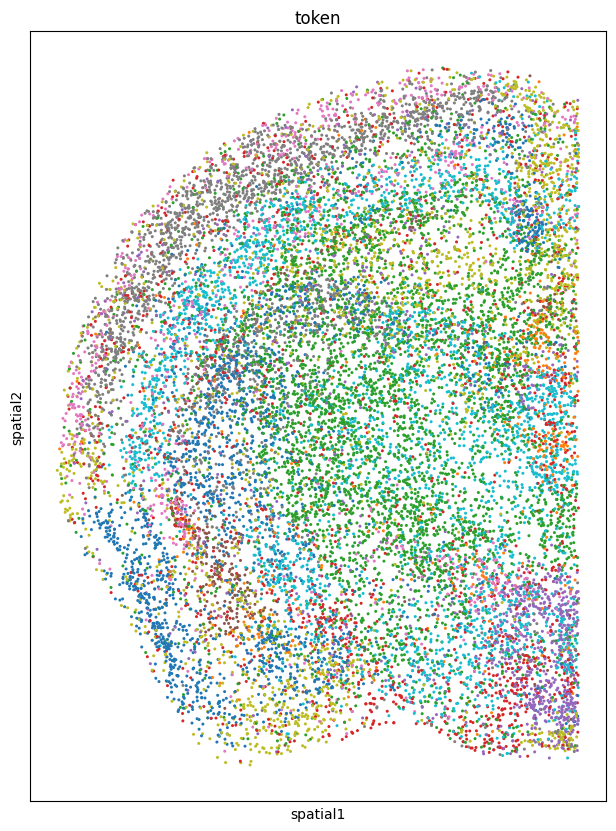

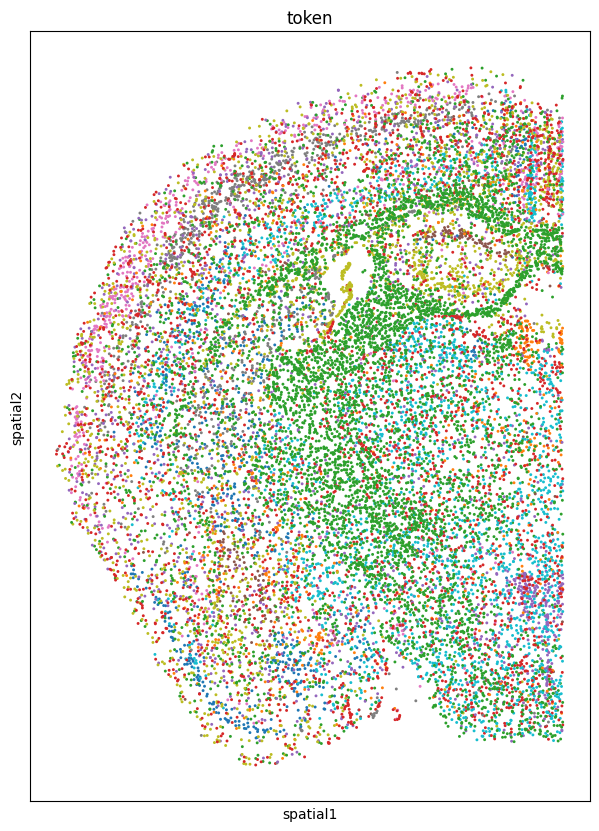

In [8]:
from analysis import assign_shared_colors, plot_spatial_with_palette


# print(soft_accuracy(test_slice.obs["token"].to_numpy().tolist(),test_slice.obsm["aligned_spatial"],adata_sampled.obs["token"].tolist(),adata_sampled.obsm["spatial"],radius=0.05))
slice_data_loader.fine_tune_test_slices[0].obsm["spatial"] = slice_data_loader.fine_tune_test_slices[0].obsm["aligned_spatial"]
slice_data_loader.train_slices[-1].obsm["spatial"] = slice_data_loader.train_slices[-1].obsm["aligned_spatial"]
assign_shared_colors([predicted_adata_infer,slice_data_loader.fine_tune_test_slices[0]], color_key="token")
plot_spatial_with_palette(predicted_adata_infer, color_key="token", spot_size=0.003, figsize=(10,10))

# plot_spatial_with_palette(predicted_adata, color_key="token", spot_size=0.003, figsize=(10,10))
# plot_spatial_with_palette(test_slice, color_key="entropy", spot_size=0.002, figsize=(30,30))
# plot_spatial_with_palette(adata_argmax, color_key="token", spot_size=0.001, figsize=(30,30))
plot_spatial_with_palette(slice_data_loader.fine_tune_test_slices[0], color_key="token", spot_size=0.003, figsize=(10,10))
# plot_spatial_with_palette(slice_data_loader.train_slices[-1], color_key="token", spot_size=0.003, figsize=(10,10))

/tmp/ipykernel_2634690/4098342171.py:5: ImplicitModificationWarning: Setting element `.obsm['spatial']` of view, initializing view as actual.
  slice_data_loader.val_slices[0].obsm["spatial"] = slice_data_loader.val_slices[0].obsm["aligned_spatial"]


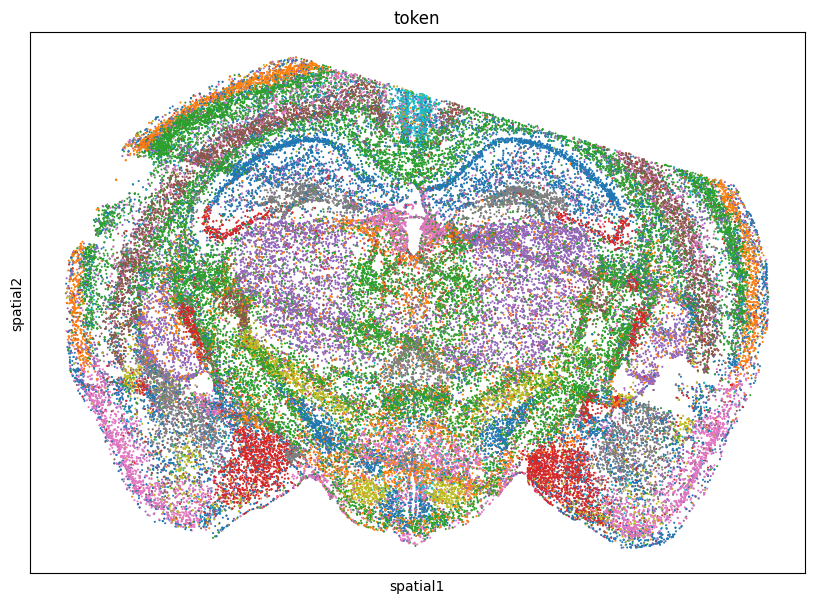

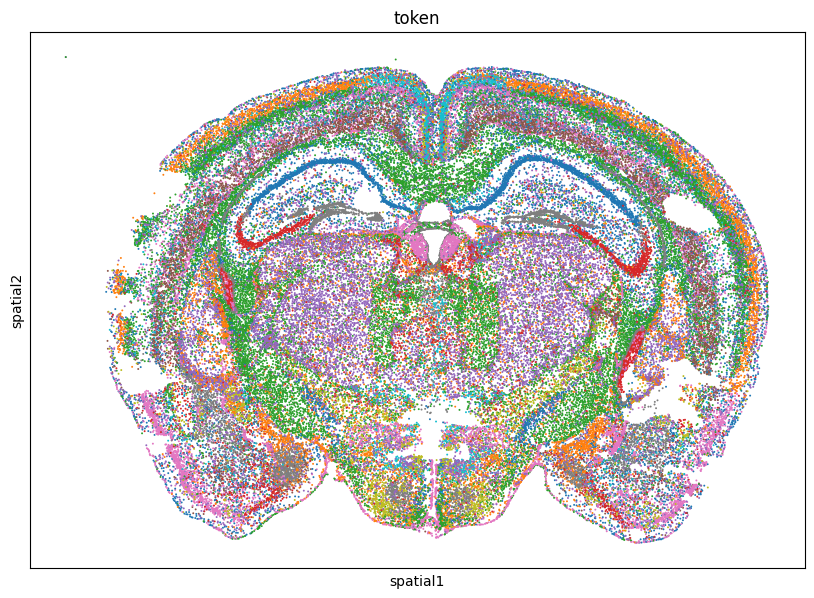

In [6]:
from analysis import assign_shared_colors, plot_spatial_with_palette


# print(soft_accuracy(test_slice.obs["token"].to_numpy().tolist(),test_slice.obsm["aligned_spatial"],adata_sampled.obs["token"].tolist(),adata_sampled.obsm["spatial"],radius=0.05))
slice_data_loader.val_slices[0].obsm["spatial"] = slice_data_loader.val_slices[0].obsm["aligned_spatial"]
assign_shared_colors([predicted_adata,slice_data_loader.val_slices[0]], color_key="token")
plot_spatial_with_palette(predicted_adata, color_key="token", spot_size=0.003, figsize=(10,10))
# plot_spatial_with_palette(test_slice, color_key="entropy", spot_size=0.002, figsize=(30,30))
# plot_spatial_with_palette(adata_argmax, color_key="token", spot_size=0.001, figsize=(30,30))
plot_spatial_with_palette(slice_data_loader.val_slices[0], color_key="token", spot_size=0.003, figsize=(10,10))

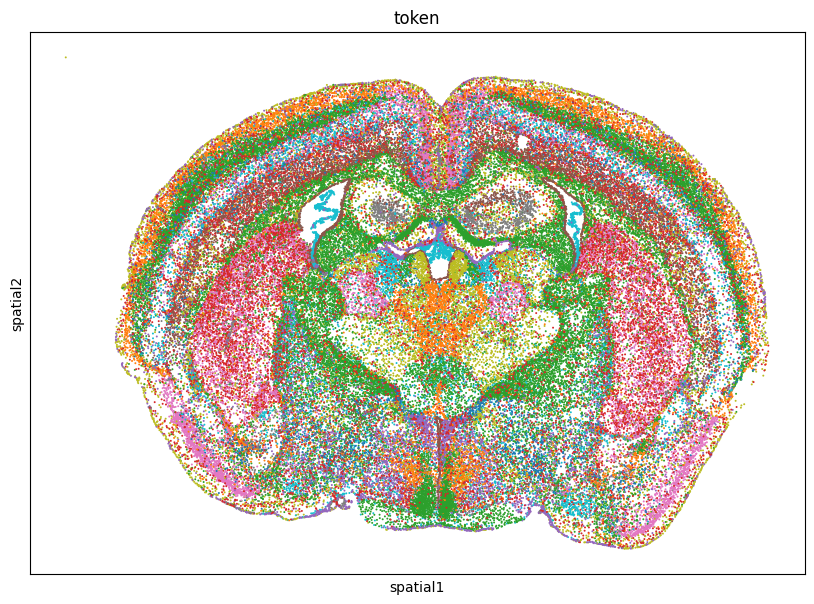

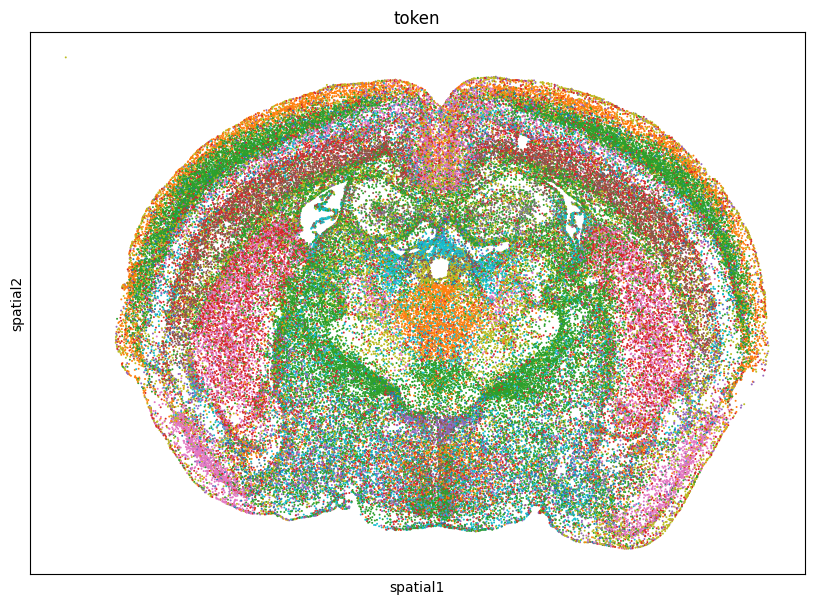

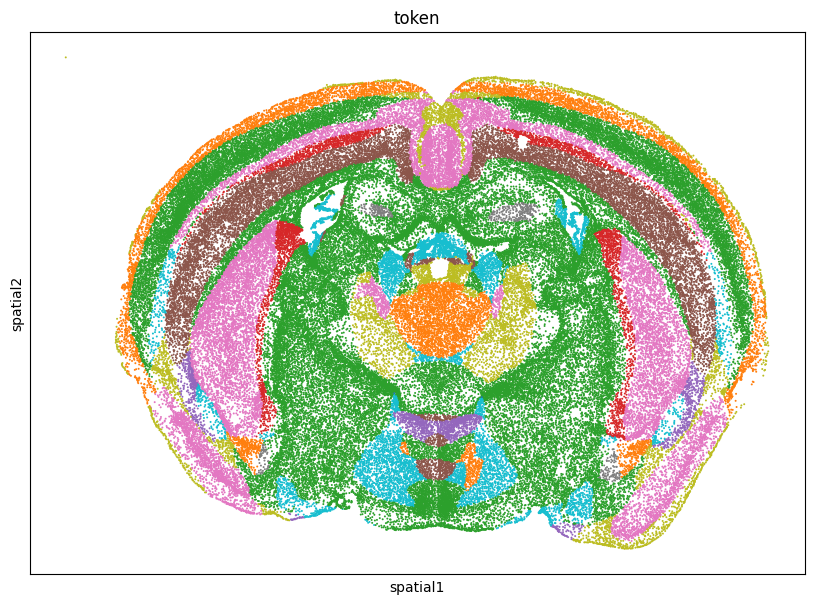

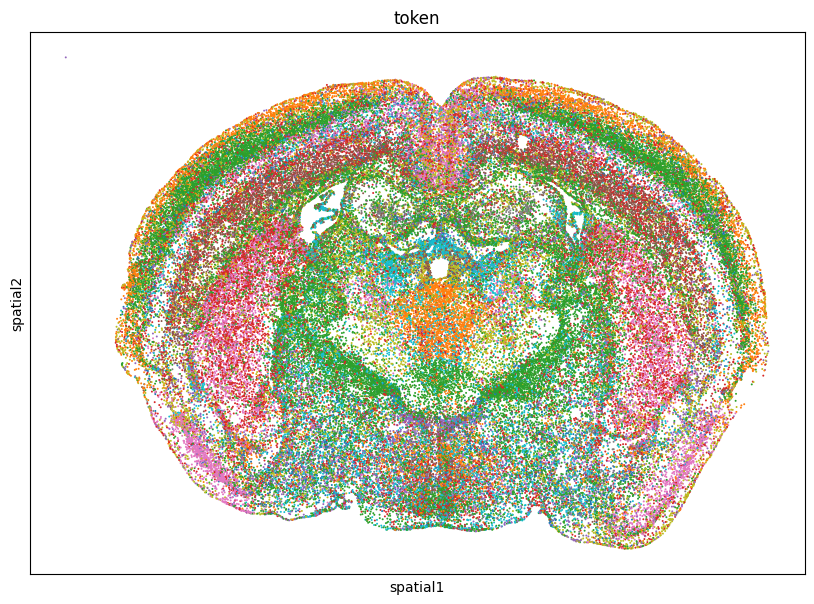

In [ ]:
# import anndata as ad
# from matplotlib.pyplot import rc_context
# from metrics4 import *
# from analysis import *

# new_tissue=slices_tokenized2[43]#ad.concat(slices_tokenized2)


# device="cuda"
# xyz_samples = torch.tensor(new_tissue.obsm["aligned_spatial"], dtype=torch.float32).to(device)
# adata_argmax, _ = generate_anndata_from_samples(region_model_adpated, xyz_samples, device, sample_from_probs=False)
# adata_sampled, _ = generate_anndata_from_samples(region_model_adpated, xyz_samples, device, sample_from_probs=True)


# print(soft_accuracy(test_slice.obs["token"].to_numpy().tolist(),test_slice.obsm["aligned_spatial"],adata_sampled.obs["token"].tolist(),adata_sampled.obsm["spatial"],radius=0.05))
adata_homo=adata_sampled.copy()
adata_homo.obs["token"]=homogenized_labels

assign_shared_colors([adata_sampled,new_tissue,adata_homo,adata_argmax], color_key="token")
new_tissue.obsm["spatial"]=new_tissue.obsm["aligned_spatial"]
plot_spatial_with_palette(new_tissue, color_key="token", spot_size=0.003, figsize=(10,10))
# plot_spatial_with_palette(test_slice, color_key="entropy", spot_size=0.002, figsize=(30,30))
# plot_spatial_with_palette(adata_argmax, color_key="token", spot_size=0.001, figsize=(30,30))
plot_spatial_with_palette(adata_sampled, color_key="token", spot_size=0.003, figsize=(10,10))
plot_spatial_with_palette(adata_argmax, color_key="token", spot_size=0.003, figsize=(10,10))

plot_spatial_with_palette(adata_homo, color_key="token", spot_size=0.003, figsize=(10,10))

